# Classificação usando Naive Bayes


## Bibliotecas usadas:
- scikit-learn
  - https://scikit-learn.org/stable/modules/naive_bayes.html
- pandas

In [17]:
SEED = 2022

In [18]:
import pandas as pd

labels = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]

# TODO: desfazer edição dessa linha
path_dataset = "avila-tr.txt"

avila = pd.read_csv(path_dataset, sep=",",header=None,names=labels)
avila

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [19]:
path_test_dataset = "avila-ts.txt"

avila_test = pd.read_csv(path_test_dataset, sep=",",header=None,names=labels)
avila_test

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## K-Nearest Neighbors (KNN)

TODO: Descrição sucinta do KNN

###Baseline

Antes de tentar encontrar o melhor parâmetro k para o modelo, iremos treinar um modelo mais básico com k=3. Dessa forma, poderemos perceber o ganho de desempenho ocasioando por uma seleção mais cuidadosa do parâmetro.

In [20]:
X_train = avila.drop('Class',axis=1).to_numpy()
y_train = avila['Class'].to_numpy()

X_test = avila_test.drop('Class',axis=1).to_numpy()
y_test = avila_test['Class'].to_numpy()

print('Train: ',X_train.shape, y_train.shape)
print('Test:  ',X_test.shape,  y_test.shape)

Train:  (10430, 10) (10430,)
Test:   (10437, 10) (10437,)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
train_score = model_knn.score(X_train,y_train)
test_score  = model_knn.score(X_test, y_test)

print('train score: ', train_score)
print('test score: ', test_score)

train score:  0.8701821668264621
test score:  0.7578806170355467


###Fine-Tuning

 Para alcançar melhores resultados, buscaremos o valor de K que traz os melhores resultados para o modelo. Exploraremos os resultados de F1-Score, Precision e Recall de modelos sobre um conjunto de valores entre 1 e 50. Para essa tarefa, usaremos o GridSearch, que faz uma busca exaustiva no espaço de valores usando validação cruzada, eliminando a necessidade de se separar uma parte do conjunto de treino para realizar a validação do modelo.

In [23]:
k_values = range(1,50)
scores = ['precision_macro','recall_macro','f1_macro']

In [24]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={'n_neighbors': k_values},
    scoring=scores,
    n_jobs=-1,
    refit=False,
    return_train_score=True,
    cv=5
)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, refit=False,
             return_train_score=True,
             scoring=['precision_macro', 'recall_macro', 'f1_macro'])

In [25]:
results_df = pd.DataFrame(gs.cv_results_)

results_df.index = k_values

results_df[['mean_train_f1_macro','mean_test_f1_macro',
            'mean_train_recall_macro','mean_test_recall_macro',
            'mean_train_precision_macro','mean_test_precision_macro']]

,mean_train_f1_macro,mean_test_f1_macro,mean_train_recall_macro,mean_test_recall_macro,mean_train_precision_macro,mean_test_precision_macro
1,1.000000,0.739940,1.000000,0.720784,1.000000,0.766803
2,0.855714,0.688949,0.813584,0.638692,0.921477,0.780746
3,0.851243,0.709752,0.813864,0.665920,0.897390,0.777080
4,0.815066,0.677423,0.763060,0.627618,0.888523,0.765071
5,0.795160,0.672633,0.743996,0.624549,0.871533,0.756873
6,0.762671,0.656504,0.703250,0.603196,0.862617,0.769731
7,0.744729,0.650431,0.690030,0.601853,0.840412,0.755873
8,0.728302,0.636576,0.670152,0.587025,0.839954,0.756975
9,0.622644,0.533795,0.567561,0.487869,0.743198,0.639787
10,0.606751,0.530677,0.550604,0.481334,0.734979,0.654488


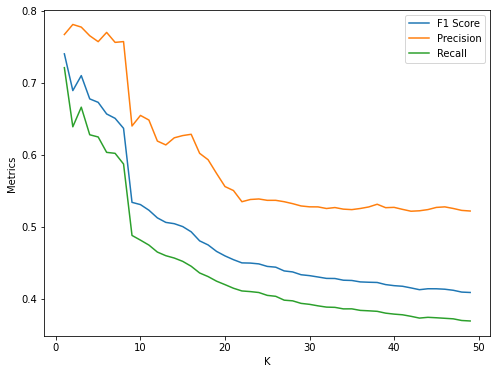

In [26]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('K')
ax.set_ylabel('Metrics')

ax.plot(k_values, gs.cv_results_['mean_test_f1_macro'], label='F1 Score')
ax.plot(k_values, gs.cv_results_['mean_test_precision_macro'], label='Precision',)
ax.plot(k_values, gs.cv_results_['mean_test_recall_macro'], label='Recall',)

ax.legend()
plt.show()

 Pelo gráfico acima, percebe-se que todas as métricas se comportam de maneira bastante similar ao longo dos valores de K analisados.
 Percebe-se que os melhores valores de K estão mais à esquerda, sendo aqueles com menor magnitude. É válido ressaltar a queda brusca em todas as métricas que há a no ponto onde K=8. 

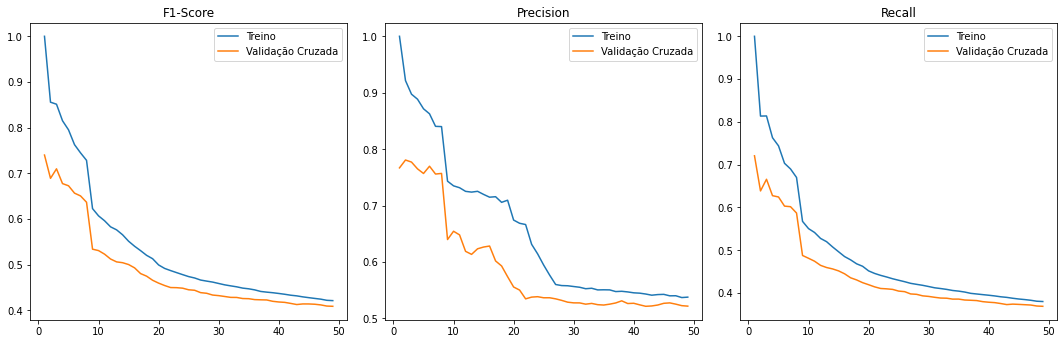

In [27]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(k_values,gs.cv_results_['mean_train_f1_macro'])
ax[0].plot(k_values,gs.cv_results_['mean_test_f1_macro'])

ax[1].plot(k_values,gs.cv_results_['mean_train_precision_macro'])
ax[1].plot(k_values,gs.cv_results_['mean_test_precision_macro'])

ax[2].plot(k_values,gs.cv_results_['mean_train_recall_macro'])
ax[2].plot(k_values,gs.cv_results_['mean_test_recall_macro'])

for i in range(0,3):
  ax[i].legend(('Treino','Validação Cruzada'))

ax[0].set_title('F1-Score')
ax[1].set_title('Precision')
ax[2].set_title('Recall')

fig.tight_layout(pad=1.5)
plt.show()

Observando os gráficos e a tabela de valores, percebemoes que para o valor K=1, o modelo sofria overffiting uma vez que possuia resultados perfeitos no treinamento. Sendo assim, evitaremos esse valor.

Por fim, percebe-se que o K que produz os melhores resultados, sem causar overffiting é o com K=3. Por coincidência, o mesmo que testamos no modelo base. 

In [28]:
from sklearn.metrics import classification_report

best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train,y_train)

y_pred = best_knn.predict(X_test)

c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           A       0.74      0.86      0.80      4286
           B       1.00      1.00      1.00         5
           C       0.62      0.44      0.51       103
           D       0.74      0.55      0.63       353
           E       0.79      0.65      0.71      1095
           F       0.66      0.67      0.66      1962
           G       0.71      0.53      0.60       447
           H       0.74      0.53      0.62       520
           I       0.97      0.95      0.96       832
           W       1.00      0.60      0.75        45
           X       0.94      0.83      0.88       522
           Y       0.86      0.75      0.80       267

    accuracy                           0.76     10437
   macro avg       0.81      0.70      0.74     10437
weighted avg       0.76      0.76      0.75     10437



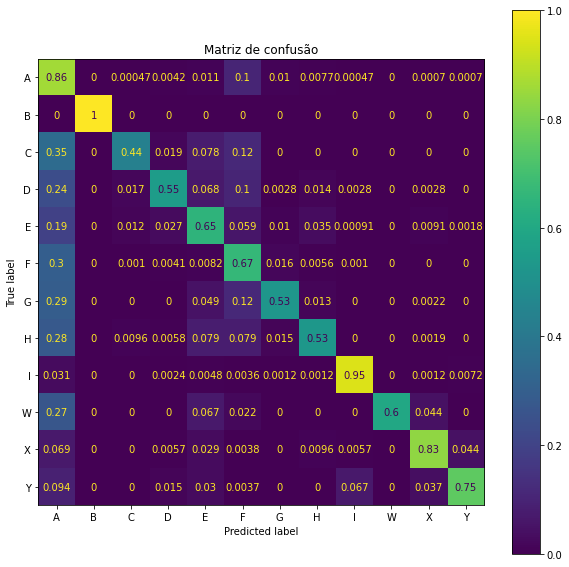

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from numpy import unique

classes = sorted(unique(y_train))

fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")

cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
cm_display.plot(ax=ax)
plt.show()


###Conclusão
 Percebe-se que o KNN obteve uma performance razoável em solucionar o problema. Como pode ser visto na matriz de confusão, o modelo constantemente prediz a classe A, mesmo quando ela não é a correta, provavelmente pelo fato dessa classe possuir a maior quantidade de exmplos.  
 Nota-se também que o modelo se sai melhor em classificar algumas classes do que outras. A classe B tem seus exemplos do teste perfeitamente classificados enquanto que a o modelo falha em classificar exemplos de C mais do que metade das vezes.
